# Comparative Analysis of Blockly in Case 1: With and Without Automatic Image Representation Conversion


In [1]:
!git clone https://github.com/c3di/im2im.git

import base64
from pkg_resources import resource_filename
from IPython.display import IFrame, display

def display_html(html_file_path, width=1200, height=900):
  with open(html_file_path, 'r') as file:
      html_content = file.read()

  html_base64 = base64.b64encode(html_content.encode()).decode()
  data_uri = f"data:text/html;base64,{html_base64}"
  display(IFrame(data_uri, width, height))

!cp "im2im/evaluation/case_1/retinal.jpg" "retinal.jpg"

Cloning into 'im2im'...
remote: Enumerating objects: 2450, done.
remote: Counting objects: 100% (448/448), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 2450 (delta 338), reused 376 (delta 287), pack-reused 2002
Receiving objects: 100% (2450/2450), 1.13 MiB | 11.76 MiB/s, done.
Resolving deltas: 100% (1528/1528), done.


## Blockly without automatic image representation conversion

---



In [2]:
html_file_path = 'im2im/evaluation/case_1/blockly_without_im2im.html'
display_html(html_file_path, 1700, 1000)

**Generated Code from Previouse Workflow in Blockly**

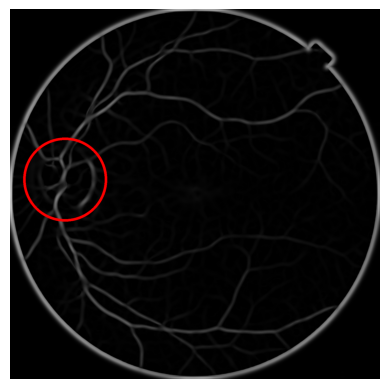

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
from skimage.util import img_as_ubyte
from skimage.color import gray2rgb
from skimage.filters import sato
import cv2
from PIL import ImageDraw

denoised_image = cv2.fastNlMeansDenoisingColored(cv2.imread('retinal.jpg'), None, 10, 10, 7, 21)

sato_filtered_image = sato(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY), sigmas=range(1, 10, 2), black_ridges=True)

uint8_image = gray2rgb(sato_filtered_image)

pil_image = Image.fromarray(img_as_ubyte(uint8_image / uint8_image.max()))
draw = ImageDraw.Draw(pil_image)
draw.ellipse([(210 - 160, 650 - 160), (210 + 160, 650 + 160)], outline='red', width=10)


plt.imshow(pil_image, cmap='viridis')
plt.axis('off')
plt.show()

**Image Visulization**

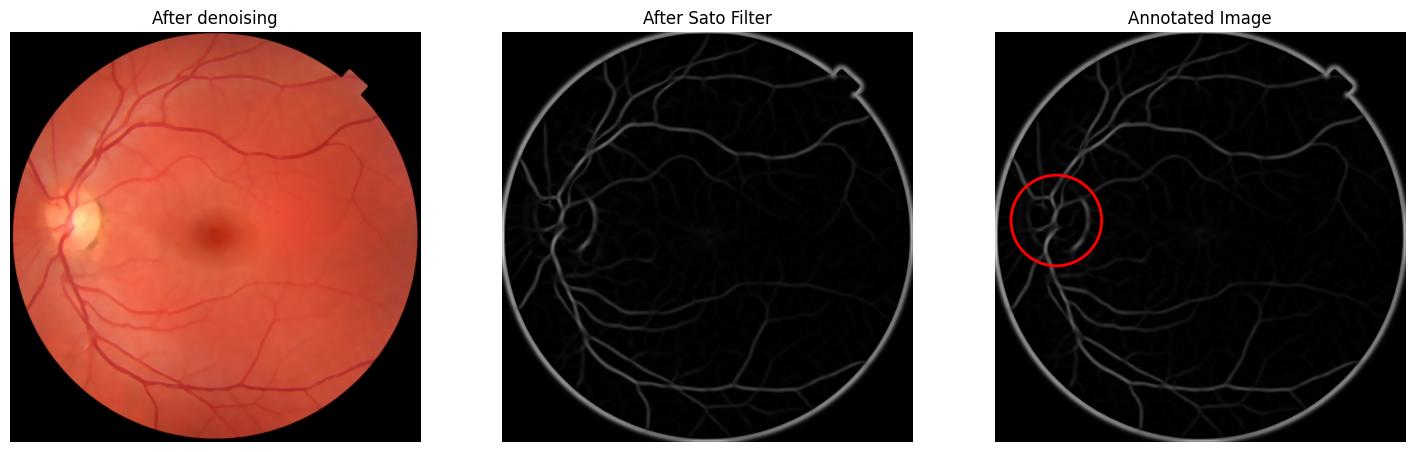

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(denoised_image[:,:,::-1])
ax[0].set_title('After denoising')
ax[0].axis('off')

ax[1].imshow(sato_filtered_image, cmap='gray')
ax[1].set_title('After Sato Filter')
ax[1].axis('off')

ax[2].imshow(pil_image)
ax[2].set_title('Annotated Image')
ax[2].axis('off')

plt.show()